In [135]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Here, I load the main datasets for training and testing. There are 8 columns:**
1. id - identification number for the person
2. cholesterol - cholesterol level
3. gluc - glucose level
4. smoke - dummy variable for smoking or not
5. alco - dummy variable for alcohol drinking or not
6. active - dummy variable for actively doing physical activities or not
7. pressure - high and low blood pressure measures
8. diabetes - dummy variable for whether a person has diabetes or not


In [136]:
diabetes_train = pd.read_csv( "C:/Users/Tsenguunn/Documents/Toptal/diabetes_train_analysis.csv", sep="," )
diabetes_test = pd.read_csv( "C:/Users/Tsenguunn/Documents/Toptal/diabetes_test_analysis.csv", sep="," )

diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes
0,56041,low,low,0,0,1,120/80,0
1,83393,low,low,0,0,1,120/80,0
2,29416,high,high,1,0,0,160/110,1
3,55191,low,low,0,0,1,100/70,0
4,42861,low,low,0,0,1,130/80,0


**Here, I create one-hot-encoding dummy variables for the cholesterol level labels.**

In [137]:
chol_value_list = diabetes_train['gluc'].unique()

diabetes_train['chol_low'] = ( diabetes_train['cholesterol'] == 'low' ).astype(float)
diabetes_train['chol_high'] = ( diabetes_train['cholesterol'] == 'high' ).astype(float)
diabetes_train['chol_medium'] = ( diabetes_train['cholesterol'] == 'medium' ).astype(float)

diabetes_test['chol_low'] = ( diabetes_test['cholesterol'] == 'low' ).astype(float)
diabetes_test['chol_high'] = ( diabetes_test['cholesterol'] == 'high' ).astype(float)
diabetes_test['chol_medium'] = ( diabetes_test['cholesterol'] == 'medium' ).astype(float)

diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,chol_medium
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,0.0
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,0.0
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,0.0
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,0.0
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,0.0


**Also, we can create a function that creates one-hot-encoding dummy variables from the categorical variable and append them to the existing dataframe.**

In [138]:
def one_hot_encoder( df, col_name, cat_values ):
    
    for i in list(cat_values):
        
        df[f"{col_name}_{i}"] = ( df[col_name] == i ).astype(float)
        
    return df

**Using this function, I created one-hot-encoding dummy variables for the glucose level label.**

In [139]:
diabetes_train['gluc_low'] = ( diabetes_train['gluc'] == 'low' ).astype(float)
diabetes_train['gluc_high'] = ( diabetes_train['gluc'] == 'high' ).astype(float)
diabetes_train['gluc_medium'] = ( diabetes_train['gluc'] == 'medium' ).astype(float)

diabetes_test['gluc_low'] = ( diabetes_test['gluc'] == 'low' ).astype(float)
diabetes_test['gluc_high'] = ( diabetes_test['gluc'] == 'high' ).astype(float)
diabetes_test['gluc_medium'] = ( diabetes_test['gluc'] == 'medium' ).astype(float)

**As we can from above table, high and low blood pressure measures are expressed in column. And they are separated by "/" character. Below, I separated them using the lambda function and created two columns for high and low blood pressure measures.**

In [140]:
diabetes_train['press_high'] = diabetes_train['pressure'].apply( lambda x: x.split("/")[0] ).astype(float)
diabetes_test['press_high'] = diabetes_test['pressure'].apply( lambda x: x.split("/")[0] ).astype(float)

diabetes_train['press_low'] = diabetes_train['pressure'].apply( lambda x: x.split("/")[1] ).astype(float)
diabetes_test['press_low'] = diabetes_test['pressure'].apply( lambda x: x.split("/")[1] ).astype(float)

diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,chol_medium,gluc_low,gluc_high,gluc_medium,press_high,press_low
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,0.0,0.0,1.0,0.0,160.0,110.0
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,0.0,1.0,0.0,0.0,100.0,70.0
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,0.0,1.0,0.0,0.0,130.0,80.0


In [141]:
diabetes_train['diabetes_label'] = 'diabetic'
diabetes_train.loc[ diabetes_train['diabetes']==0, 'diabetes_label' ] = 'non-diabetic'

diabetes_train.head()

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,chol_medium,gluc_low,gluc_high,gluc_medium,press_high,press_low,diabetes_label
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0,non-diabetic
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,0.0,1.0,0.0,0.0,120.0,80.0,non-diabetic
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,0.0,0.0,1.0,0.0,160.0,110.0,diabetic
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,0.0,1.0,0.0,0.0,100.0,70.0,non-diabetic
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,0.0,1.0,0.0,0.0,130.0,80.0,non-diabetic


**High blood pressure of people with diabetes ranges from 120 to 150 (25th to 75th percentiles).**

In [142]:
diabetes_train.loc[ diabetes_train['diabetes']==1, 'press_high' ].describe()

count    14958.000000
mean       137.948790
std        156.618273
min       -120.000000
25%        120.000000
50%        130.000000
75%        150.000000
max      14020.000000
Name: press_high, dtype: float64

**High blood pressure of people without diabetes ranges from 120 to 130 (25th to 75th percentiles).**

In [143]:
diabetes_train.loc[ diabetes_train['diabetes']==0, 'press_high' ].describe()

count    45042.000000
mean       126.136339
std        168.759377
min       -150.000000
25%        120.000000
50%        120.000000
75%        130.000000
max      16020.000000
Name: press_high, dtype: float64

**From the below boxplots, we can see that people with diabetes tend to have a greater high blood pressure than people without diabetes.**

<AxesSubplot:xlabel='press_high', ylabel='diabetes_label'>

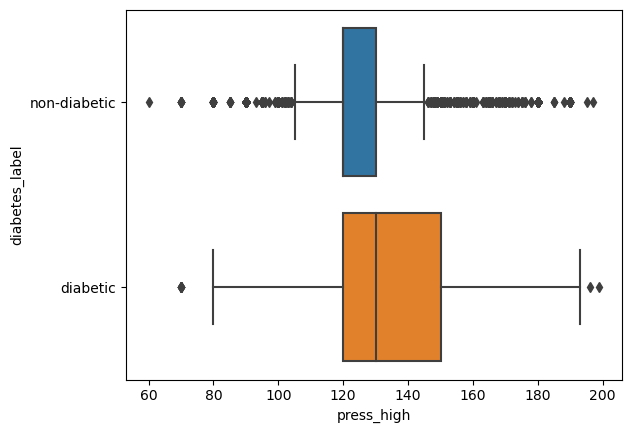

In [144]:
sns.boxplot(y=diabetes_train.loc[ (diabetes_train['press_high'] > 50) & (diabetes_train['press_high'] < 200), 'diabetes_label' ], x=diabetes_train.loc[ (diabetes_train['press_high'] > 50) & (diabetes_train['press_high'] < 200), 'press_high' ])

**Low blood pressure of people with diabetes ranges from 80 to 90 (25th to 75th percentiles).**

In [145]:
diabetes_train.loc[ diabetes_train['diabetes']==1, 'press_low' ].describe()

count    14958.000000
mean       147.198155
std        375.753602
min         40.000000
25%         80.000000
50%         90.000000
75%         90.000000
max      11000.000000
Name: press_low, dtype: float64

**Low blood pressure of people concentrates around 80 (25th to 75th percentiles).**

In [146]:
diabetes_train.loc[ diabetes_train['diabetes']==0, 'press_low' ].describe()

count    45042.000000
mean        79.695196
std          9.120448
min          0.000000
25%         80.000000
50%         80.000000
75%         80.000000
max        160.000000
Name: press_low, dtype: float64

**From the below boxplots, we can see that people with diabetes tend to have a greater low blood pressure than people without diabetes.**

<AxesSubplot:xlabel='press_low', ylabel='diabetes_label'>

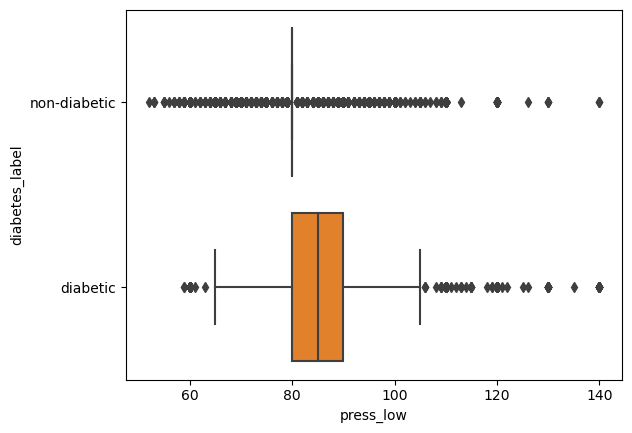

In [147]:
sns.boxplot(y=diabetes_train.loc[ (diabetes_train['press_low'] > 50) & (diabetes_train['press_low'] < 150), 'diabetes_label' ], x=diabetes_train.loc[ (diabetes_train['press_low'] > 50) & (diabetes_train['press_low'] < 150), 'press_low' ])

**Below, I plot the alcohol consumption rates for diabetic and non-diabetic people. It shows that there exists a slightly higher alcohol consumption rate among diabetic people.**

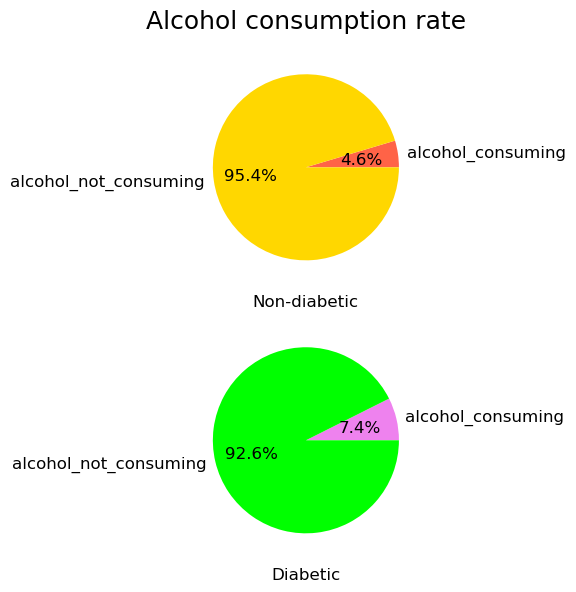

In [228]:
diabetes_train['alco_label'] = 'alcohol_consuming'
diabetes_train.loc[ diabetes_train['alco'] == 0, 'alco_label' ] = 'alcohol_not_consuming'

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))
diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('alco_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                  colors=['tomato', 'gold'], ax=ax1)
diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('alco_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                 colors=['violet', 'lime'], ax=ax2)
fig.suptitle('Alcohol consumption rate', size=18)

ax1.set_ylabel('', size=22)
ax1.set_xlabel('Non-diabetic', size=12)
ax2.set_xlabel('Diabetic', size=12)
ax2.set_ylabel('', size=22)
plt.tight_layout()
plt.show()

**Below, I plot the smoking rates for diabetic and non-diabetic people. It shows that there exists a slightly higher smoking rate among diabetic people.**

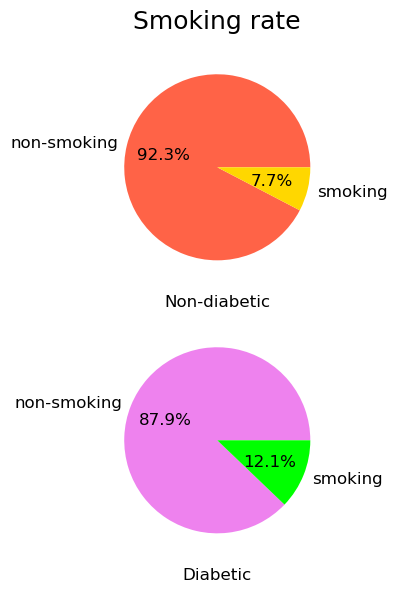

In [229]:
diabetes_train['smoke_label'] = 'smoking'
diabetes_train.loc[ diabetes_train['smoke'] == 0, 'smoke_label' ] = 'non-smoking'

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))
diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('smoke_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                  colors=['tomato', 'gold'], ax=ax1)
diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('smoke_label').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                 colors=['violet', 'lime'], ax=ax2)
fig.suptitle('Smoking rate', size=18)
ax1.set_ylabel('', size=22)
ax1.set_xlabel('Non-diabetic', size=12)
ax2.set_xlabel('Diabetic', size=12)
ax2.set_ylabel('', size=22)
plt.tight_layout()
plt.show()

**Below, I plot the cholesterol levels for diabetic and non-diabetic people. It shows that diabetic people tend to have higher cholesterol levels compared with non-diabetic people.**

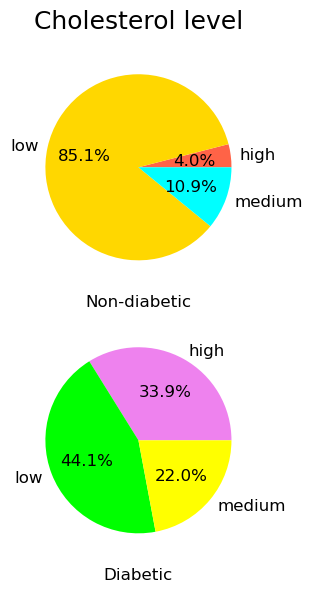

In [230]:

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))
diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('cholesterol').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                  colors=['tomato', 'gold', 'cyan'], ax=ax1)
diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('cholesterol').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                 colors=['violet', 'lime', 'yellow'], ax=ax2)

fig.suptitle('Cholesterol level', size=18)
ax1.set_ylabel('', size=12)
ax1.set_xlabel('Non-diabetic', size=12)
ax2.set_xlabel('Diabetic', size=12)
ax2.set_ylabel('', size=12)
plt.tight_layout()
plt.show()

**Below, I plot the glucose levels for diabetic and non-diabetic people. It shows that diabetic people tend to have higher glucose levels compared with non-diabetic people.**

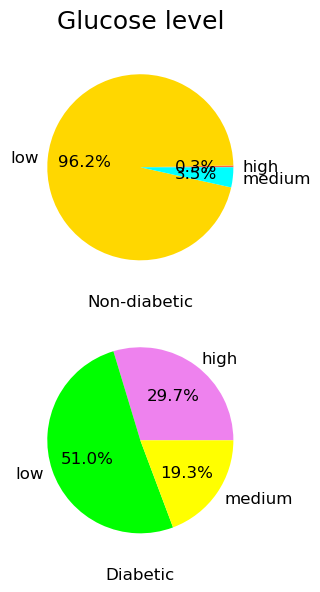

In [231]:

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 6))
diabetes_train.loc[ diabetes_train['diabetes']==0, : ].groupby('gluc').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                  colors=['tomato', 'gold', 'cyan'], ax=ax1)
diabetes_train.loc[ diabetes_train['diabetes']==1, : ].groupby('gluc').size().plot(kind='pie', autopct="%1.1f%%", textprops={'fontsize': 12},
                                 colors=['violet', 'lime', 'yellow'], ax=ax2)
fig.suptitle('Glucose level', size=18)
ax1.set_ylabel('', size=12)
ax1.set_xlabel('Non-diabetic', size=12)
ax2.set_xlabel('Diabetic', size=12)
ax2.set_ylabel('', size=12)
plt.tight_layout()
plt.show()

**Here, I create the first machine learning classification model with these transformed features. The first model I tried is the Logistic Regression model**

In [152]:
regressor_columns = [ 'smoke', 'alco', 'active', 'press_high', 'press_low', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'gluc_medium']
target_column = [ 'diabetes' ]

In [153]:
diabetes_train_x = diabetes_train[ regressor_columns ]
diabetes_train_y = diabetes_train[ target_column ]

diabetes_test_x = diabetes_test[ regressor_columns ]
diabetes_test_y = diabetes_test[ target_column ]

In [154]:
clf_logistic = LogisticRegression(random_state=10).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred = clf_logistic.predict( diabetes_test_x )

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Then, I evaluated the accuracy of this model. The accuracy was 89.05%. Essentially, this model classified correctly 89% of time on the test data.**

In [155]:
from sklearn.metrics import accuracy_score

accuracy_score( diabetes_test_pred, diabetes_test_y )

0.8905

**Then, I used the Random Forest Classifier model. The accuracy was the same as the Logistic Regression model.**

In [157]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=12, random_state=0).fit( diabetes_train_x, diabetes_train_y )
diabetes_test_pred_rf = clf_RF.predict( diabetes_test_x )

accuracy_score( diabetes_test_pred_rf, diabetes_test_y )

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_562728\2858469456.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(max_depth=12, random_state=0).fit( diabetes_train_x, diabetes_train_y )


0.8893

**Next, I merged the dataset, which contains the information on people's age, height, weight, and gender, into the main table.**

In [158]:
diabetes_info_train = pd.read_csv( "C:/Users/Tsenguunn/Documents/Toptal/diabetes_train_info.csv", sep="," )

diabetes_info_train.head() 

,id,age,height,weight,gender
0,0,18393,168,62.0,female
1,1,20228,156,85.0,m
2,2,18857,165,64.0,m
3,3,48,169,82.0,female
4,4,47,156,56.0,m


**Below, we can see that gender has non-consistent labels. I cleaned this non-consistency, and labelled female as f and male as m.**

In [159]:
diabetes_info_train['gender'].unique()

array(['female', 'm', 'f', 'male'], dtype=object)

In [160]:
diabetes_info_train.loc[ diabetes_info_train['gender']=='female', 'gender' ] = 'f'
diabetes_info_train.loc[ diabetes_info_train['gender']=='male', 'gender' ] = 'm'

gender_uniq_vals = diabetes_info_train['gender'].unique()
diabetes_info_train = one_hot_encoder( diabetes_info_train, "gender", gender_uniq_vals )

diabetes_train = diabetes_train.merge( diabetes_info_train, on=['id'], how='left' )


**I conducted the same cleaning for the test data and merged it into the main test dataframe.**

In [161]:
diabetes_info_test = pd.read_csv( "C:/Users/Tsenguunn/Documents/Toptal/diabetes_test_info.csv", sep="," )

diabetes_info_test.loc[ diabetes_info_test['gender']=='female', 'gender' ] = 'f'
diabetes_info_test.loc[ diabetes_info_test['gender']=='male', 'gender' ] = 'm'

diabetes_info_test = one_hot_encoder( diabetes_info_test, "gender", gender_uniq_vals )
diabetes_test = diabetes_test.merge( diabetes_info_test, on=['id'], how='left' )


In [162]:
diabetes_test.columns

Index(['id', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'pressure',
       'diabetes', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'gluc_medium', 'press_high', 'press_low', 'age', 'height',
       'weight', 'gender', 'gender_f', 'gender_m'],
      dtype='object')

**Then, I created another model by adding height and gender as extra regressors.**

In [163]:
regressor_columns = [ 'smoke', 'alco', 'active', 'press_high', 'press_low', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'gluc_medium', 'height', 'gender_f', 'gender_m']

target_column = [ 'diabetes' ]

In [164]:
#diabetes_train_temp = diabetes_train[ regressor_columns + target_column ].dropna()
#diabetes_train_temp = diabetes_train

diabetes_train_x = diabetes_train[ regressor_columns ]
diabetes_train_y = diabetes_train[ target_column ]

diabetes_test_x = diabetes_test[ regressor_columns ]
diabetes_test_y = diabetes_test[ target_column ]

**Here, I use the Logistic Regression model first for this case with more regressors.**

In [165]:
clf_logistic = LogisticRegression(random_state=10).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred = clf_logistic.predict( diabetes_test_x )

from sklearn.metrics import accuracy_score

accuracy_score( diabetes_test_pred, diabetes_test_y )

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9191

**Then, I used the Random Forest Classifier model. Both models performed around 91.9% of accuracy on the test data. We can see that adding height and gender as extra regressors improved the accuracy from 89% to 92%.**

In [166]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=12, random_state=0).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred_rf = clf_RF.predict( diabetes_test_x )

accuracy_score( diabetes_test_pred_rf, diabetes_test_y )

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_562728\2413099059.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(max_depth=12, random_state=0).fit( diabetes_train_x, diabetes_train_y )


0.9185

**Below, we can see that many age values have very high numbers. This signals that some age information might be added in terms of days and some other age information might be added in terms of years. I clean this inconsistency by converting age information in terms of days into ages measured in years.**

In [167]:
diabetes_train['age'].describe()

count    60000.000000
mean     13604.096283
std       9153.754517
min         30.000000
25%         60.000000
50%      18161.000000
75%      20573.000000
max      23713.000000
Name: age, dtype: float64

In [168]:
diabetes_train['age_2'] = diabetes_train['age']

diabetes_train.loc[ diabetes_train['age'] > 150, 'age_2'] = diabetes_train['age'] / 365

import math

diabetes_train['age'] = diabetes_train['age'].apply( lambda x: math.floor( x ) )

diabetes_train.head() 

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,...,diabetes_label,alco_label,smoke_label,age,height,weight,gender,gender_f,gender_m,age_2
0,56041,low,low,0,0,1,120/80,0,1.0,0.0,...,non-diabetic,alcohol_not_consuming,non-smoking,21443,169,73.0,f,1.0,0.0,58.747945
1,83393,low,low,0,0,1,120/80,0,1.0,0.0,...,non-diabetic,alcohol_not_consuming,non-smoking,18374,167,58.0,m,0.0,1.0,50.339726
2,29416,high,high,1,0,0,160/110,1,0.0,1.0,...,diabetic,alcohol_not_consuming,smoking,17592,179,118.0,f,1.0,0.0,48.197260
3,55191,low,low,0,0,1,100/70,0,1.0,0.0,...,non-diabetic,alcohol_not_consuming,non-smoking,14687,155,86.0,m,0.0,1.0,40.238356
4,42861,low,low,0,0,1,130/80,0,1.0,0.0,...,non-diabetic,alcohol_not_consuming,non-smoking,64,165,65.0,m,0.0,1.0,64.000000


In [169]:
diabetes_test['age_2'] = diabetes_test['age']

diabetes_test.loc[ diabetes_test['age'] > 150, 'age_2'] = diabetes_test['age'] / 365

diabetes_test['age'] = diabetes_test['age'].apply( lambda x: math.floor( x ) )

diabetes_test.head() 

,id,cholesterol,gluc,smoke,alco,active,pressure,diabetes,chol_low,chol_high,...,gluc_medium,press_high,press_low,age,height,weight,gender,gender_f,gender_m,age_2
0,93552,low,low,0,0,1,110/70,0,1.0,0.0,...,0.0,110.0,70.0,59,169,72.0,m,0.0,1.0,59.000000
1,90949,low,low,0,0,1,110/80,0,1.0,0.0,...,0.0,110.0,80.0,19147,167,69.0,m,0.0,1.0,52.457534
2,94702,high,low,0,0,1,120/80,0,0.0,1.0,...,0.0,120.0,80.0,44,166,72.0,m,0.0,1.0,44.000000
3,95862,low,low,1,0,1,140/80,0,1.0,0.0,...,0.0,140.0,80.0,20340,163,83.0,f,1.0,0.0,55.726027
4,91802,low,low,0,0,1,120/80,0,1.0,0.0,...,0.0,120.0,80.0,15883,175,84.0,f,1.0,0.0,43.515068


**Next, I add age as an extra regressar to the previous model.**

In [172]:
regressor_columns = [ 'smoke', 'alco', 'active', 'press_high', 'press_low', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'gluc_medium', 'height', 'gender_f', 'gender_m', 'age_2']

target_column = [ 'diabetes' ]

In [173]:
diabetes_train_temp = diabetes_train

diabetes_train_x = diabetes_train_temp[ regressor_columns ]
diabetes_train_y = diabetes_train_temp[ target_column ]

diabetes_test_x = diabetes_test[ regressor_columns ]
diabetes_test_y = diabetes_test[ target_column ]

**First, I used the Logistic Regression to predict the diabetes. The accuracy increased to 92.9%.**

In [174]:
clf_logistic = LogisticRegression(random_state=10).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred = clf_logistic.predict( diabetes_test_x )

from sklearn.metrics import accuracy_score

accuracy_score( diabetes_test_pred, diabetes_test_y )

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9292

**When I used the Random Forest Classifier, the accuracy increased to 94.3%.**

In [176]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=12, random_state=0).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred_rf = clf_RF.predict( diabetes_test_x )

accuracy_score( diabetes_test_pred_rf, diabetes_test_y )

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_562728\2413099059.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(max_depth=12, random_state=0).fit( diabetes_train_x, diabetes_train_y )


0.9432

**Below, I explored the missing values across columns. We can see that the weight column has many missing values. I imputed the missing values for weight using the simple average imputer which impute the missing values as the average of non-missing values.**

In [181]:
diabetes_train.isna().sum()

id                   0
cholesterol          0
gluc                 0
smoke                0
alco                 0
active               0
pressure             0
diabetes             0
chol_low             0
chol_high            0
chol_medium          0
gluc_low             0
gluc_high            0
gluc_medium          0
press_high           0
press_low            0
diabetes_label       0
alco_label           0
smoke_label          0
age                  0
height               0
weight            1982
gender               0
gender_f             0
gender_m             0
age_2                0
dtype: int64

In [182]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit( diabetes_train[['weight']] )

diabetes_train['weight_2']  = imp.transform( diabetes_train[['weight']]  )
diabetes_test['weight_2']  = imp.transform( diabetes_test[['weight']]  )

**Then, I added the weight information as an extra regressor to the previous model.**

In [185]:
regressor_columns = [ 'smoke', 'alco', 'active', 'press_high', 'press_low', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'gluc_medium', 'height', 'gender_f', 'gender_m', 'age_2', 'weight_2']

target_column = [ 'diabetes' ]

In [186]:
diabetes_train_x = diabetes_train[ regressor_columns ]
diabetes_train_y = diabetes_train[ target_column ]

diabetes_test_x = diabetes_test[ regressor_columns ]
diabetes_test_y = diabetes_test[ target_column ]

**I used the Logistic Regression for this case where weight is an extra regressor compared with the previous model. The accuracy increased to 96.5%.**

In [188]:
clf_logistic = LogisticRegression(random_state=10).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred = clf_logistic.predict( diabetes_test_x )

from sklearn.metrics import accuracy_score

accuracy_score( diabetes_test_pred, diabetes_test_y )

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.965

**When I used the Random Forest Classifier, the accuracy increased to 98.88%.**

In [190]:
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(max_depth=19, random_state=0).fit( diabetes_train_x, diabetes_train_y )

diabetes_test_pred_rf = clf_RF.predict( diabetes_test_x )

accuracy_score( diabetes_test_pred_rf, diabetes_test_y )

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_562728\711970718.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(max_depth=19, random_state=0).fit( diabetes_train_x, diabetes_train_y )


0.9888

**Finally, I used the Xgboost Classifier to predict the diabetes.**

In [191]:
import xgboost as xgb

In [194]:
regressor_columns = [ 'smoke', 'alco', 'active', 'press_high', 'press_low', 'chol_low', 'chol_high', 'chol_medium', 'gluc_low',
       'gluc_high', 'height', 'gender_f', 'gender_m', 'age_2', 'weight_2']

target_column = [ 'diabetes' ]

diabetes_train_x = diabetes_train[ regressor_columns ]
diabetes_train_y = diabetes_train[ target_column ]

diabetes_test_x = diabetes_test[ regressor_columns ]
diabetes_test_y = diabetes_test[ target_column ]

model = xgb.XGBClassifier(num_parallel_tree=4, max_depth=22, n_estimators=150, learning_rate=0.1)


model.fit( diabetes_train_x, diabetes_train_y )

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=22, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=4, predictor='auto', random_state=0, ...)

**The accuracy of this Xgboost model was 99.12%. This means that with all these data cleaning processes, we were able to create more than 99% accurate model for predicting diabetes based on smoking and drinking habits, high and low blood pressures, glucose and cholesterol levels, age, gender, height, and weight.**

In [195]:
diabetes_test_pred = model.predict( diabetes_test_x )

from sklearn.metrics import accuracy_score

accuracy_score( diabetes_test_pred, diabetes_test_y )

0.9912

**Below, I plotted the feature importances for the regressors. We can see that the glucose level is a greatly informative feature for predicting diabetes. Furthermore, active physical activity, gender, cholesterol level, low blood pressure, weight, and age can provide the useful information for predicting diabetes.**

Text(0.5, 0, 'Xgboost Feature Importance')

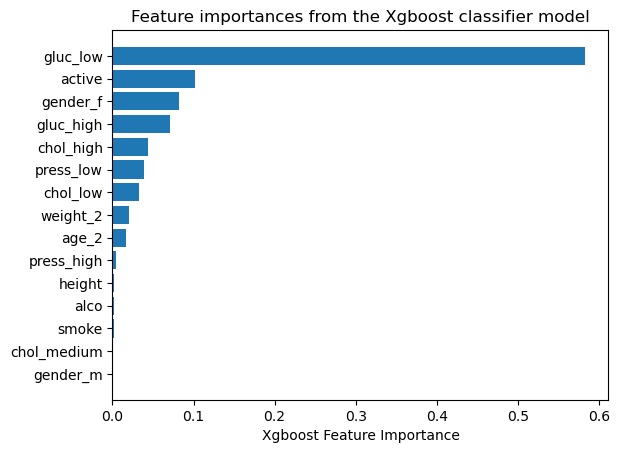

In [201]:
sorted_idx = model.feature_importances_.argsort()

plt.title("Feature importances from the Xgboost classifier model")
plt.barh(np.array(regressor_columns)[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")